In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Embedding, TimeDistributed, Lambda, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np

## Генерация

In [22]:
loaded_piano_rolls = np.load('input-data/piano_rolls/classical/piano_rolls.npy', allow_pickle=True)

In [23]:
sequence_length = int(loaded_piano_rolls[0].shape[0])
num_features = int(loaded_piano_rolls[0].shape[1])

Здесь будет VAE

In [24]:
def generate_model(sequence_length, num_features):
    
    latent_dim = 4096

    input_tensor = Input(shape=(sequence_length, num_features, 1))
    encoder_1 = Flatten()(input_tensor)
    encoder_2 = Dense(8192, activation='relu')(encoder_1)
    encoded = Dense(latent_dim, activation='relu')(encoder_2)

    encoder = Model(input_tensor, encoded)

    decoder_1 = Dense(8192, activation='relu')(encoded)
    decoder_2 = Dense(128*128, activation='relu')(decoder_1)
    decoded = Reshape((sequence_length, num_features, 1))(decoder_2)

    autoencoder = Model(input_tensor, decoded)

    optimizer = Adam(learning_rate=0.001)
    
    autoencoder.compile(optimizer=optimizer, loss='mse')
    
    autoencoder.load_weights("weights/classical/weights-03-0.0081-bigger.hdf5")

    return autoencoder


In [25]:
generate_model = generate_model(sequence_length, num_features)

predict = generate_model.predict([loaded_piano_rolls[200:500]]).reshape(-1, 128, 128)

10/10 [==============================] - 1s 124ms/step


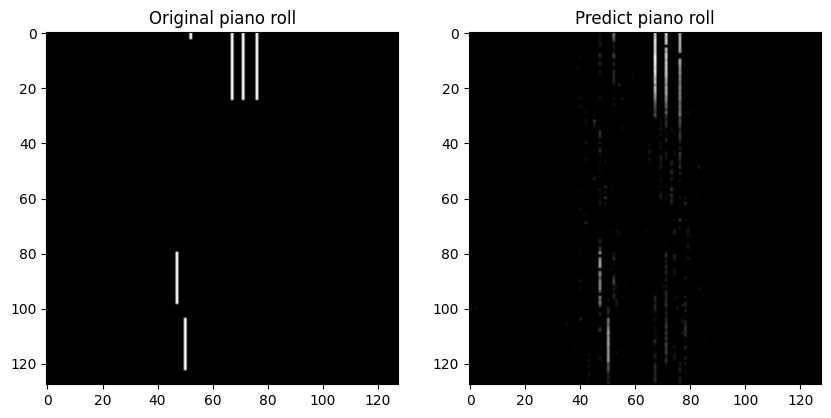

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(loaded_piano_rolls[200], cmap="gray")
axs[0].set_title("Original piano roll")
axs[1].imshow(predict[0], cmap="gray")
axs[1].set_title("Predict piano roll")


plt.show()

Создаем массив матриц с шумом

In [30]:
array_size = 128

num_matrices = 10

array_of_matrices = np.empty((num_matrices, array_size, array_size))

for i in range(num_matrices):
    noise = np.random.normal(scale=0.1, size=(array_size, array_size))
    matrix = np.random.rand(array_size, array_size)
    noisy_matrix = matrix + noise
    array_of_matrices[i] = noisy_matrix

In [33]:
generate = generate_model.predict(array_of_matrices).reshape(-1, 128, 128)

1/1 [==============================] - 0s 82ms/step


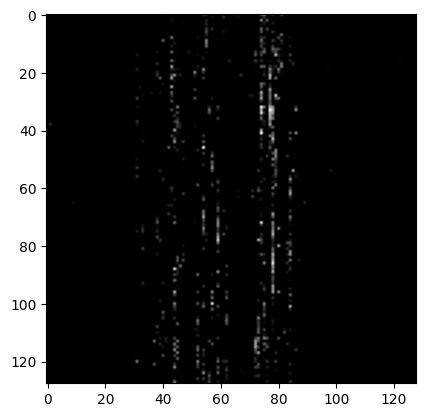

In [35]:
plt.imshow(generate[0], cmap="gray")

In [36]:
np.save('generated/piano_rolls/classical/piano_rolls.npy', generate)